In [66]:
library(lubridate)
library(tidyverse)
library(rmarkdown)
library(readr)
library(stringr)

In [67]:
df_food <- read_csv("food_claims_2212.csv")
view((df_food))

Rows: 2000 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): claim_id, claim_amount, location, cause
dbl (3): time_to_close, amount_paid, individuals_on_claim
lgl (1): linked_cases

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [68]:
df_food_clean<- df_food %>%
  mutate(claim_amount= str_replace_all(claim_amount," ","")) %>%
  mutate(claim_amount= str_replace_all(claim_amount,"R","")) %>%
  mutate(claim_amount= str_replace_all(claim_amount," ","")) 

In [69]:
 df_food_clean$claim_amount = as.numeric(gsub("\\$", "", df_food_clean$claim_amount))
   

In [70]:
median_amount_paid <- df_food_clean %>%
    summarise(med_amt_paid = median(amount_paid,na.rm = TRUE))%>%
    pull()

In [71]:
df_food_clean <- df_food_clean %>%
  mutate(amount_paid = coalesce(amount_paid,median_amount_paid))

In [72]:
df_food_clean <- df_food_clean %>%
  mutate(linked_cases = replace_na(linked_cases,FALSE))

In [73]:
df_food_clean<- df_food_clean %>%
  mutate(cause= str_replace_all(cause,"Meat","meat")) %>%
  mutate(cause= str_replace_all(cause,"VEGETABLES","vegetable")) 

In [74]:
summary(df_food_clean)

   claim_id         time_to_close    claim_amount    amount_paid   
 Length:2000        Min.   : 76.0   Min.   : 1638   Min.   : 1517  
 Class :character   1st Qu.:158.0   1st Qu.:13759   1st Qu.:11107  
 Mode  :character   Median :179.0   Median :24821   Median :20106  
                    Mean   :185.6   Mean   :27157   Mean   :21516  
                    3rd Qu.:204.0   3rd Qu.:38581   3rd Qu.:30473  
                    Max.   :518.0   Max.   :76107   Max.   :52499  
   location         individuals_on_claim linked_cases       cause          
 Length:2000        Min.   : 1.00        Mode :logical   Length:2000       
 Class :character   1st Qu.: 4.00        FALSE:1519      Class :character  
 Mode  :character   Median : 8.00        TRUE :481       Mode  :character  
                    Mean   : 8.05                                          
                    3rd Qu.:12.00                                          
                    Max.   :15.00                                   

## Task 1 
For every column in the data:
- State whether the values match the description given in the table above.
- State the number of missing values in the column.
- Describe what you did to make values match the description if they did not 	   match.

### **SOLUTION**

### claim_id:
There were 2000 unique values that matched the description given, so no correction was made, there were no missing values
### time_to_close:
The range of values was between 76 and 518 all positive and continous values, which matches the description given, so no correction was made, there were no missing values.

### claim_amount: 
The values did not match the description, as the data type was given in the character class, as against the numerical class given in the description. Data cleaning was carried out on the column, and the brazilian currency symbol was removed, after which the column was then converted to the numeric data type. There were no missing values.

### amount_paid:
The range of values in the column was between 1517 and 52499, which falls in line with the description that the column is continous and numerical. There were 36 missing values, which were replaced with the median amount paid(20105.7). 

### location:  
There were 4 unique values that matched the description given, so no correction was made, there were no missing values.

### individuals_on_claim:
There were no values less than 1, which matched the description given, so no correction was made, there were no missing values

### linked_cases:
The values in this column were either true or false which matched the description given. There were 26 missing values and the values were replaced with FALSE

### cause:
There were 5 unique values in the column which didn't match the description given, the values for "Meat" and "VEGETABLES" were replace with "meat" and "vegetable", which reduced the unique values to 3, which was what was stated in the description. There were no missing values.

## Task 2:
Create a visualization that shows the number of claims in each location. Use the
visualization to:
- State which category of the variable location has the most observations
- Explain whether the observations are balanced across categories of the
  variable location

### **SOLUTION**

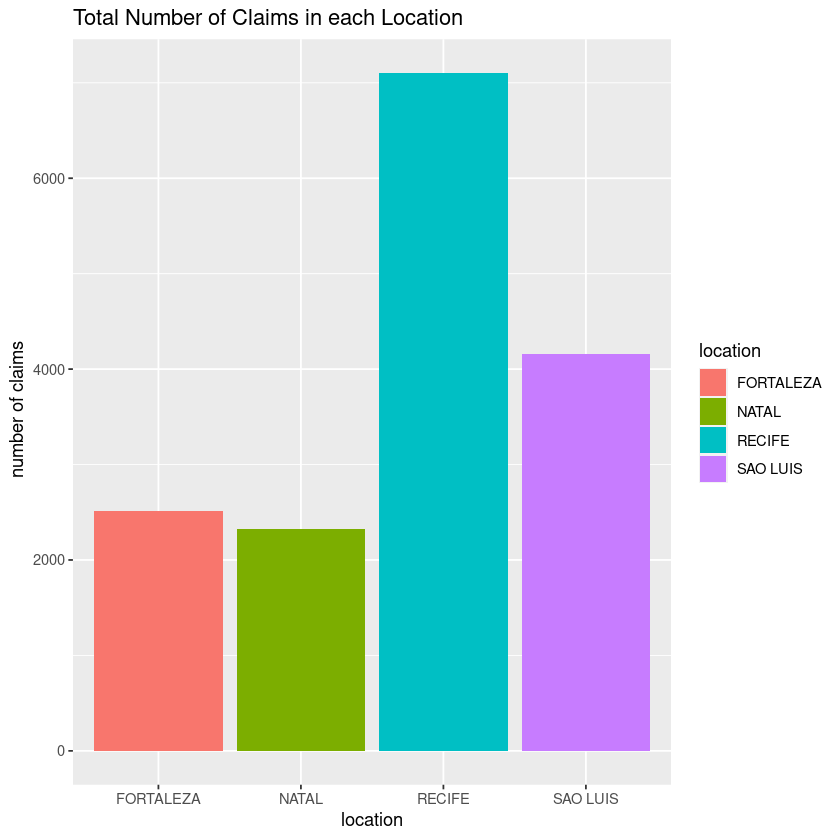

In [64]:
#creating a bar chart to show location vs number of claims
 barchar_df_food_clean<-    ggplot(df_food_clean, aes(location,individuals_on_claim, fill = location))+
                            geom_col()+
                            labs(title = "Total Number of Claims in each Location",
                                   x =  "location",
                                   y = " number of claims" )
barchar_df_food_clean

As shown in the graph above, Recife has the highest number of claims, with approximately 7,000. This is significantly higher than the next highest location, which has approximately 3,000 claims. The data is not balanced across the categories, as Recife and São Luís have significantly more claims than the other two categories. The legal team should investigate the reasons for the high number of claims in Recife and São Luís.

## Task 3
Describe the distribution of time to close for all claims. Your answer must include a
visualization that shows the distribution.

### **SOLUTION**

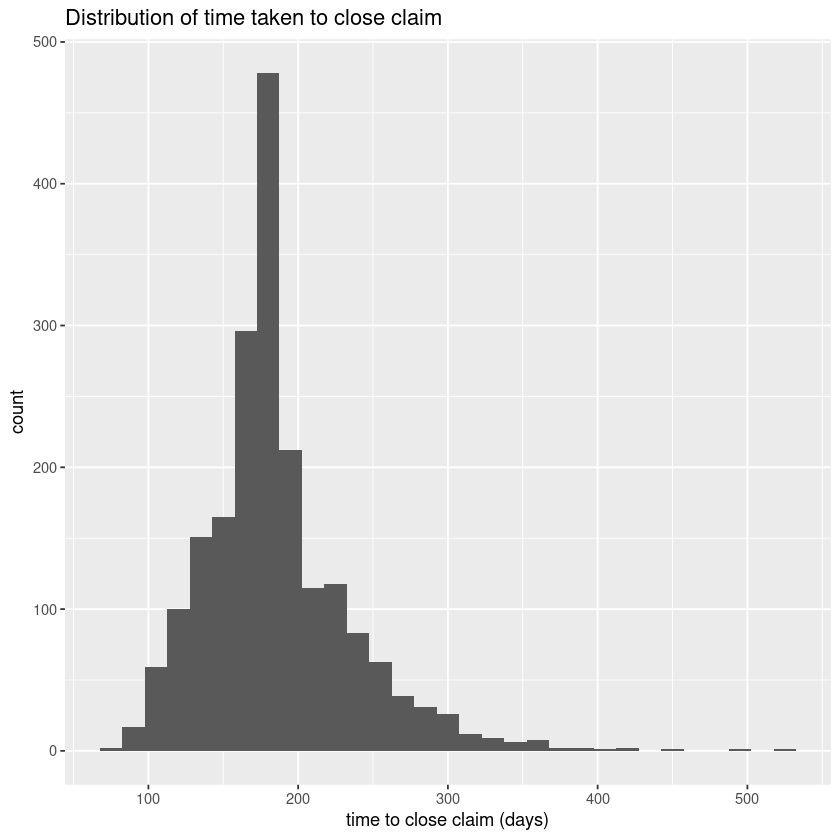

In [62]:
 TOCC_df_food_clean<-    ggplot(df_food_clean, aes(time_to_close))+
                            geom_histogram(binwidth = 15)+
                            labs(title = "Distribution of time taken to close claim",
                                  x =  "time to close claim (days)" )
 TOCC_df_food_clean

From the graph above,the distribution of time to close claims is right-skewed, with most claims being closed within 180 days. However, there are a small number of outliers that take over 400 days to close. If the legal team is interested in reducing the time to close claims, they should focus on improving the efficiency of the claims process, working with a reduction of the average 180 days.

## Task 4
Describe the relationship between time to close and location. Your answer must
include a visualization to demonstrate the relationship.

### **SOLUTION**

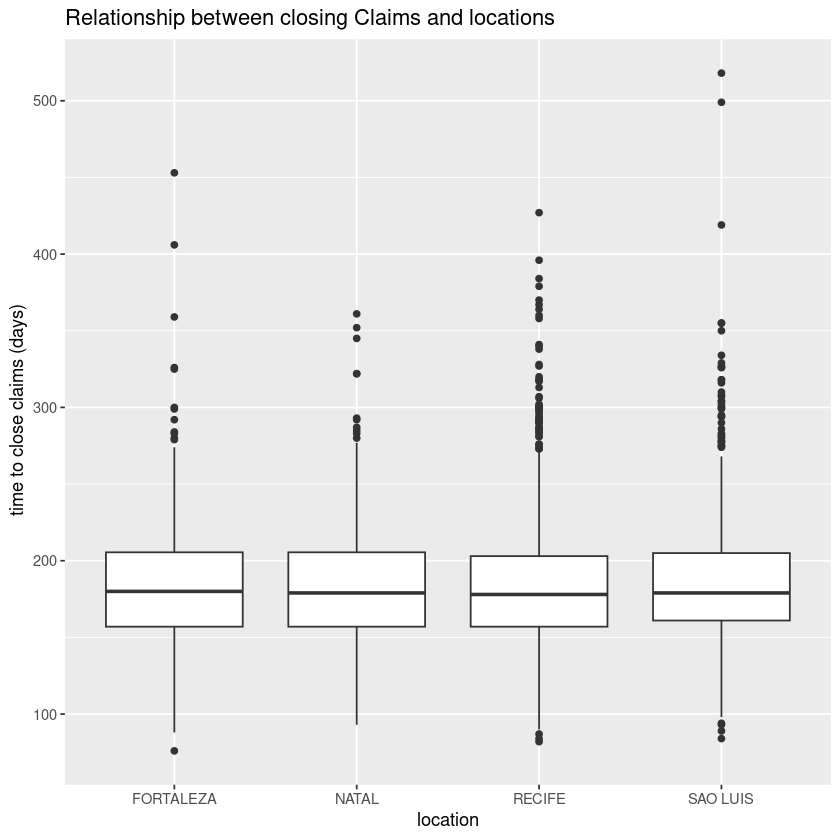

In [63]:
 CCVL_df_food_clean<-    ggplot(df_food_clean, aes(location,time_to_close))+
                          geom_boxplot()+
                          labs(title = "Relationship between closing Claims and locations",
                                  x =  "location",
                                  y = " time to close claims (days)" )
 CCVL_df_food_clean

As shown in the graph, all locations have a similar median time to close claims, which is approximately 180 days. If the legal team is interested in reducing the time to close claims, they should focus on reducing this median. The legal team should also investigate the outlier cases that took more than 400 days to close.